In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Making all then necessary imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn as sns

#(Credit for the below code goes to @ANZ check out his notebook as well)
cmap = cm.get_cmap('GnBu',12) #colormap and number
col_def =[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    col_def.append(rgb2hex(rgb))
    print(rgb2hex(rgb))

#f7fcf0
#e6f5e1
#d7efd1
#c5e8c2
#abdeb6
#8bd2bf
#6bc3c9
#4bafd1
#3193c2
#1878b4
#085da0
#084081


In [3]:
#Loading the Dataset
survey = pd.read_csv("kaggle_survey_2021_responses.csv",low_memory=False)
survey.head(10)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,484,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


## Overview
**First I look at the data set and know what and how the data is. I try to understand the data. After that I mark the columns that interest me. Those columns are mainly being Age, country, programming language, How many years they've been coding and etc., Now with that out of the way let's start the Exploration**

In [4]:
survey.shape

(25974, 369)

# State Of Indians and Japanese'

I am an Indian and I love my country. But today in this notebook I am going to be looking up the details on **Japan** and **India**. I love there Curlture especially being an **Anime fan**. So, I am going to try my best to compare on how far the data science industry is faring in both the countries. 

**I am just a beginner, and I am still in the learning stage, but none the less I am going to try my best to complete this challenge.**

In [5]:
jp = survey[survey.Q3 == 'Japan']
jp.shape

(921, 369)

In [6]:
ind = survey[survey.Q3 == 'India']
ind.shape

(7434, 369)

**Now let's see the genders in both the countries**

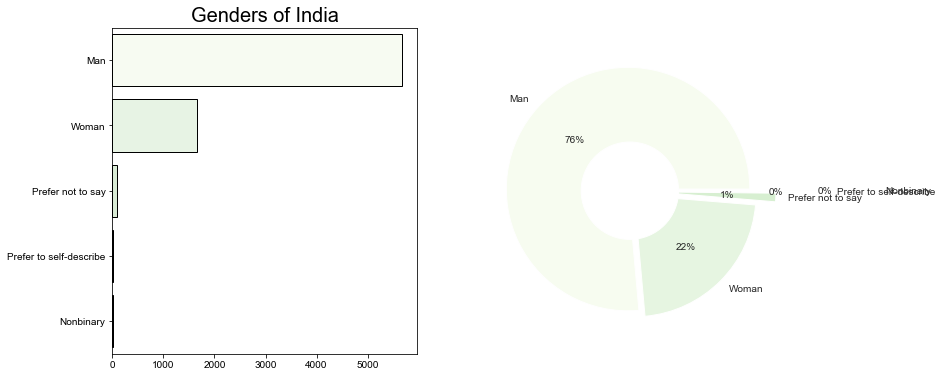

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
gen_ind = ind['Q2'].value_counts()
sns.set_style('dark')
axes[0] = sns.barplot(x=gen_ind.values, y=gen_ind.index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Genders of India", fontsize=20)
axes[1].pie(x= gen_ind,labels = gen_ind.index, colors=col_def,autopct='%.0f%%',
           explode=[0.02, 0.05, 0.2, 0.6, 1.0])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

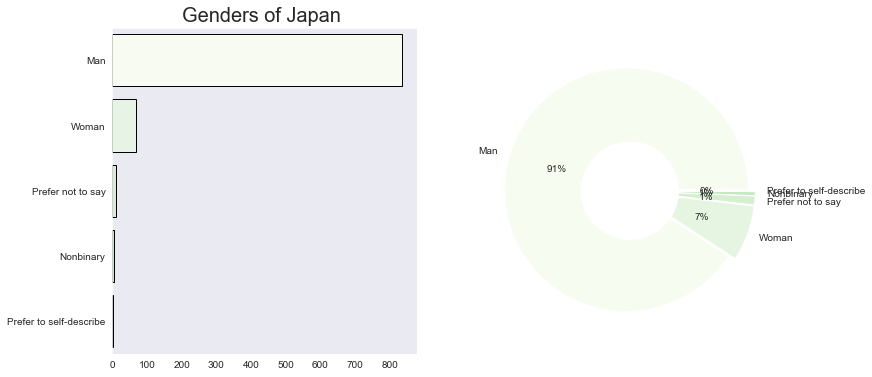

In [8]:
# Knowing the unique degrees of India
fig, axes = plt.subplots(1,2, figsize=(12, 6))
edu_jp = jp['Q2'].value_counts()
sns.set_style('dark')
axes[0] = sns.barplot(x=edu_jp.values, y=edu_jp.index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Genders of Japan ", fontsize=20)
axes[1].pie(x= edu_jp,labels = edu_jp.index, colors=col_def, autopct='%.0f%%',
           explode=[0.03 for i in edu_jp.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

**To my dissapointment I did not find new gender. I don't know what I was expecting though😅**

**I know that japan had a reasonable population, but I did not expect that there is massive male domination in the population of japan. Like only 7% are women bruh🤯. I thought that India had the domination, but japan said nah bro!!😂**

**Let's look at Education in India And Japan**

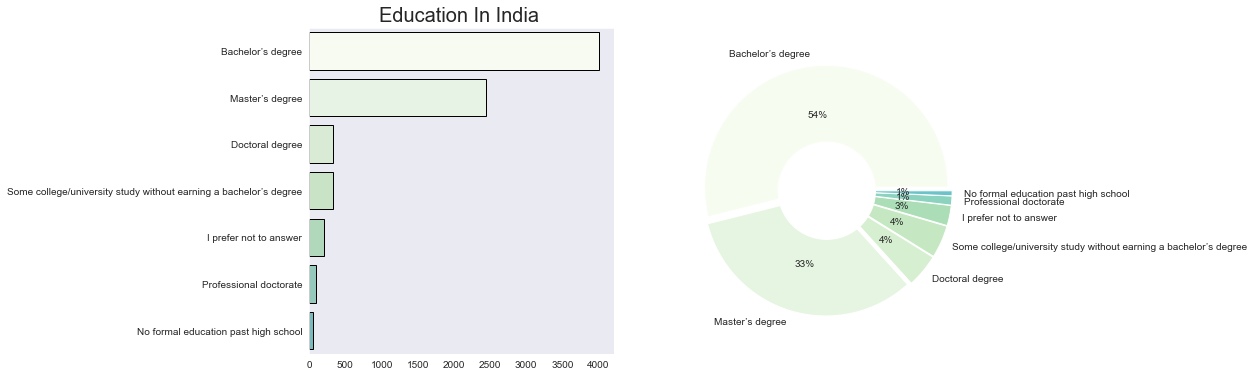

In [9]:
# Knowing the unique degrees of India
fig, axes = plt.subplots(1,2, figsize=(12, 6))
edu_ind = ind['Q4'].value_counts()
axes[0] = sns.barplot(x=edu_ind.values, y=edu_ind.index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Education In India ", fontsize=20)
axes[1].pie(x= edu_ind,labels = edu_ind.index, colors=col_def, autopct='%.0f%%',
           explode=[0.03 for i in edu_ind.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

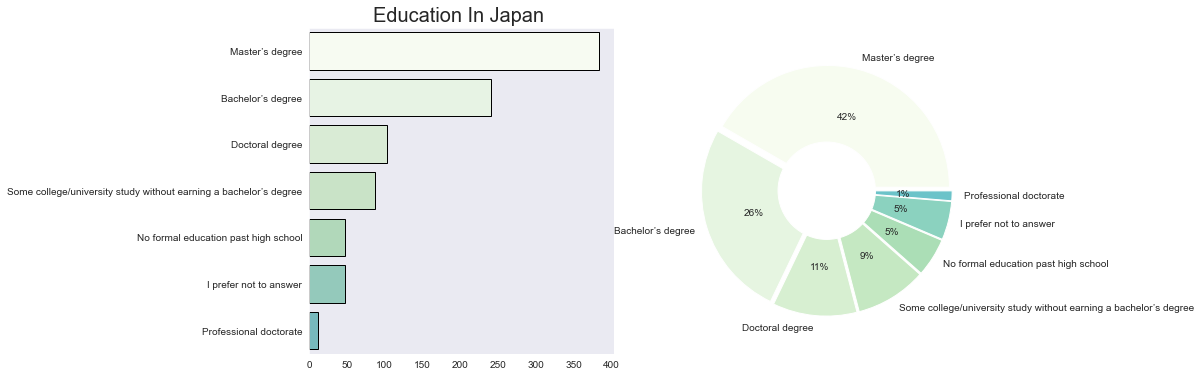

In [10]:
# Knowing the unique degrees of India
fig, axes = plt.subplots(1,2, figsize=(12, 6))
edu_jp = jp['Q4'].value_counts()
axes[0] = sns.barplot(x=edu_jp.values, y=edu_jp.index, edgecolor="black",palette=col_def, ax=axes[0])
axes[0].set_title("Education In Japan ", fontsize=20)
axes[1].pie(x= edu_jp,labels = edu_jp.index, colors=col_def, autopct='%.0f%%',
           explode=[0.03 for i in edu_ind.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

Wow, man I am really learning a lot about one of my favorite countries. Like really there are more people who did not have **education past high school** in japan(5%) than in India(1%). I guess I underestimated India, Big mistake. It really shows that India is putting more effort into education. I am not downgrading Japan(Because when we compare the population I think it would just level it out as India has more population and Japan has very less when compared to India). Now, if look at Japans graph, we can see that the **master's degree** has highest no(42%), where as in India **bachelor's degree** has the highest no(54%). If you are an Indian you know that it is a bruh movement.

**AGE**

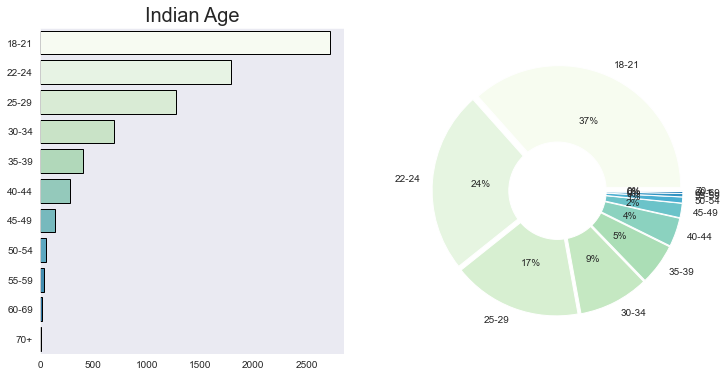

In [11]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
age_ind = ind["Q1"].value_counts()
sns.barplot(x = age_ind.values, y=age_ind.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Indian Age", fontsize=20)
axes[1].pie(x= age_ind,labels = age_ind.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in age_ind.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

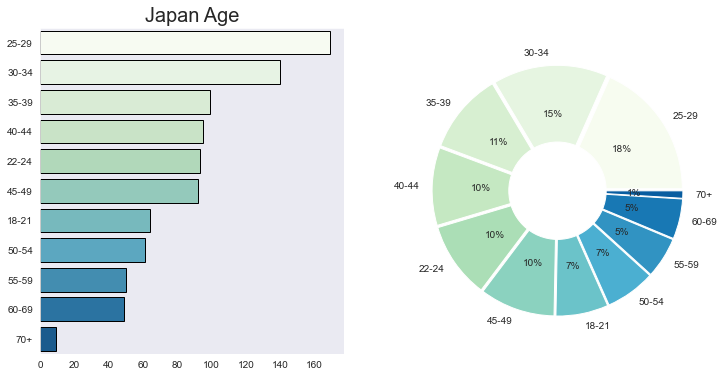

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
age_jp = jp["Q1"].value_counts()
sns.barplot(x = age_jp.values, y=age_jp.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Japan Age", fontsize=20)
axes[1].pie(x= age_jp,labels = age_jp.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in age_jp.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

If we look at the graphs above, Most of the population of India is covered by youngsters between the age 18 to 35. Where as In Japan it is almost evenly spread.

**Titles**

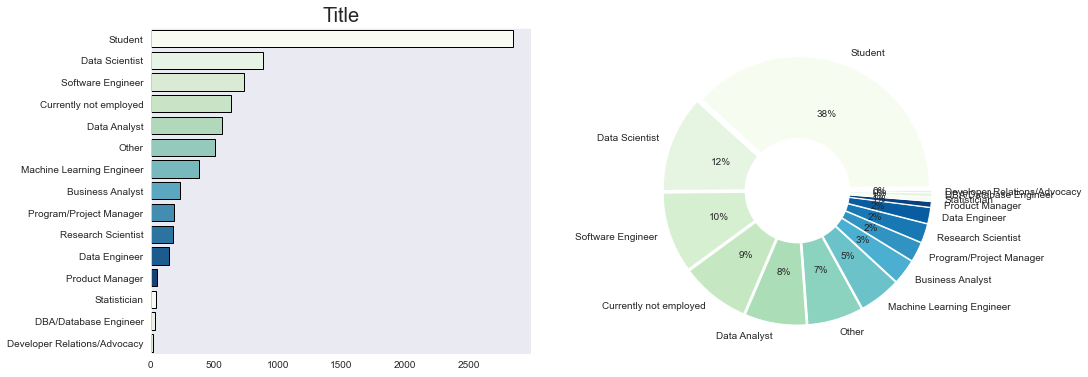

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15, 6))
titles_ind = ind["Q5"].value_counts()
sns.barplot(x = titles_ind.values, y=titles_ind.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Title", fontsize=20)
axes[1].pie(x= titles_ind,labels = titles_ind.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in titles_ind.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

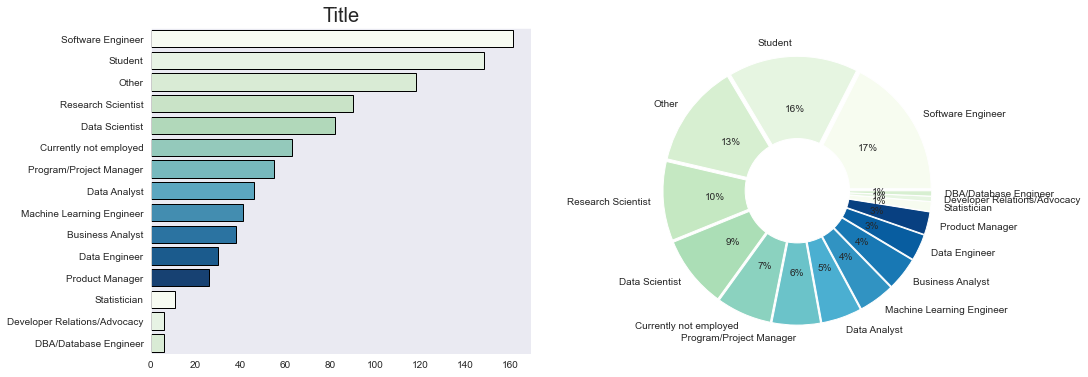

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15, 6))
titles_jp = jp["Q5"].value_counts()
sns.barplot(x = titles_jp.values, y=titles_jp.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Title", fontsize=20)
axes[1].pie(x= titles_jp,labels = titles_jp.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in titles_jp.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

This graph just shows the problem that India has right now. Even though there are so many who do bachelor's(54%). we only got employees such as Data Scientist or software engineers in meger no.s (12% and 10% respectively). Where as in Japan It is quite good actually. Job holders are more compared to students.

Now that we've seen how the data is in the interested columns let's take a look at some of their relationships.

**AGE and Gender**

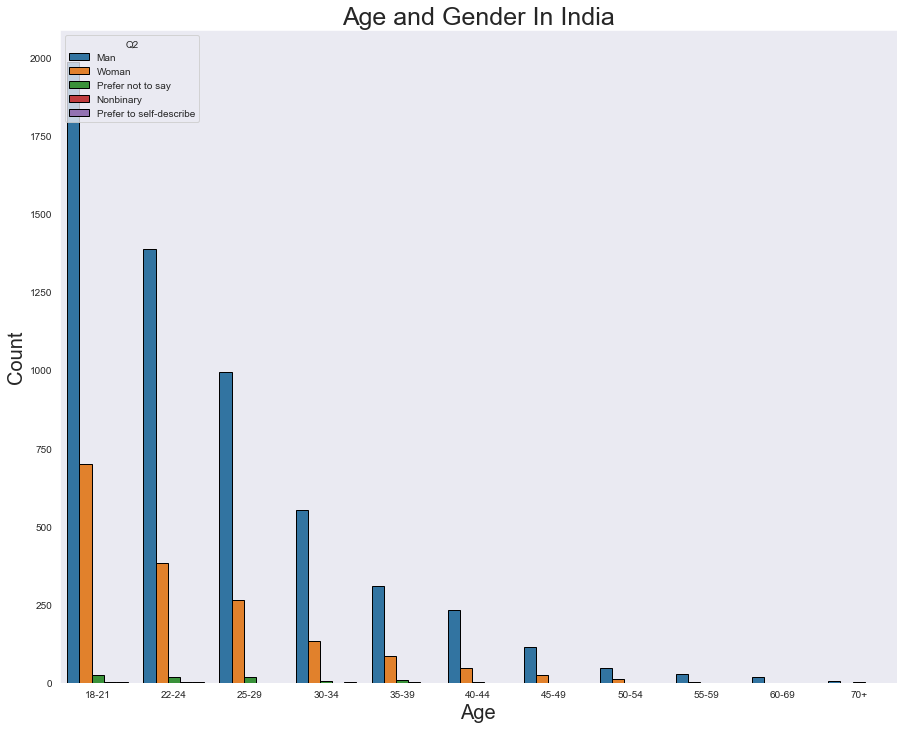

In [15]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q2", order = age_order, ec="black", data=ind)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Gender In India", fontsize=25)
plt.show()

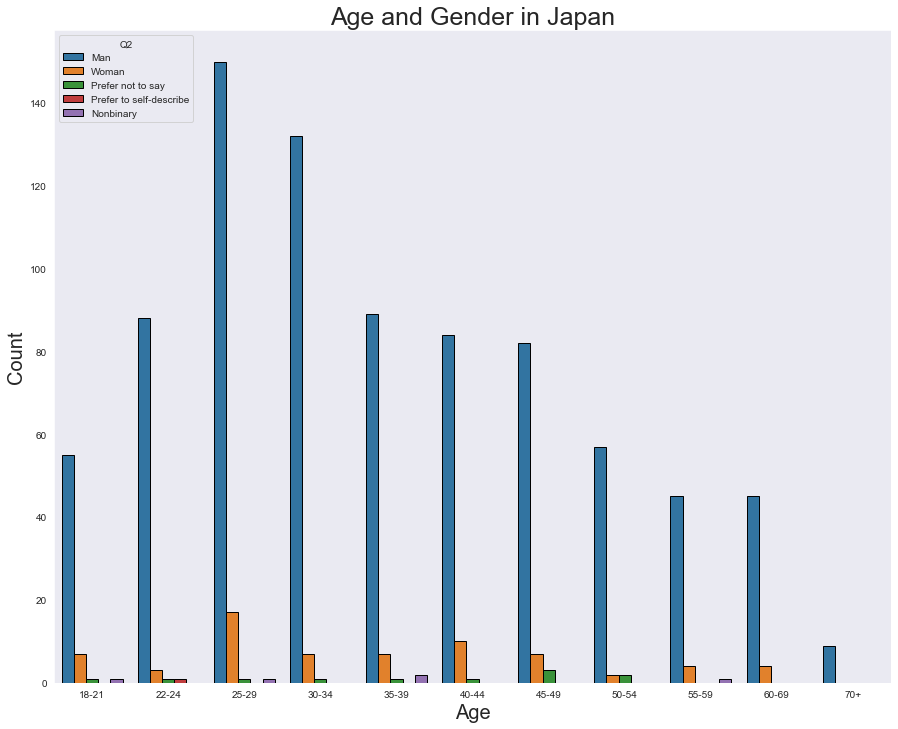

In [16]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q2", order = age_order, ec="black", data=jp)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Gender in Japan", fontsize=25)


plt.show()

**AGE and Title**

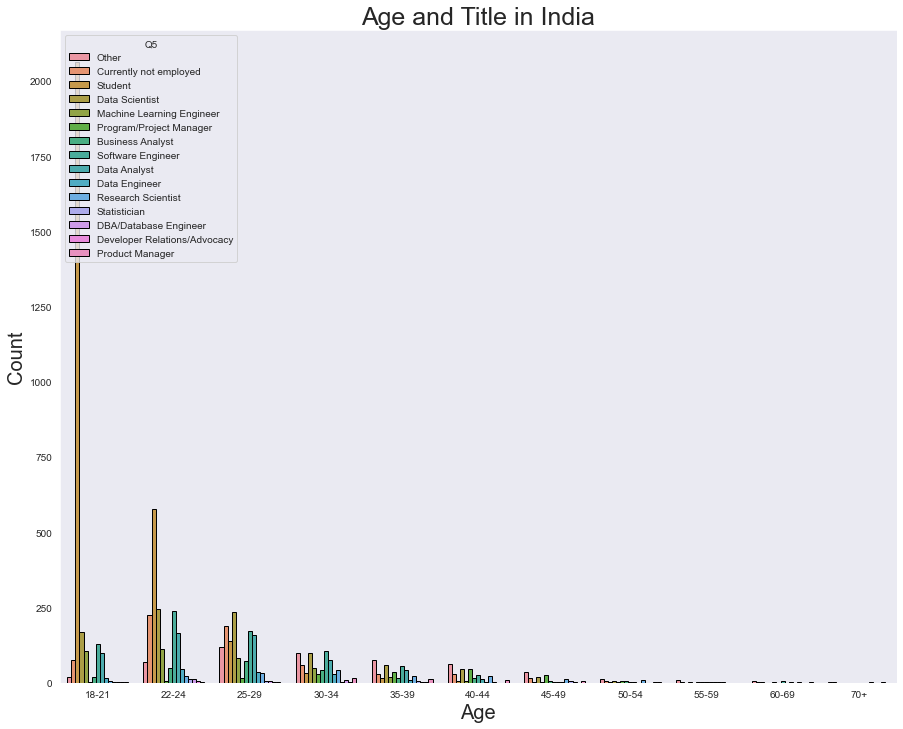

In [17]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q5", order = age_order, ec="black", data=ind)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Title in India", fontsize=25)
plt.show()

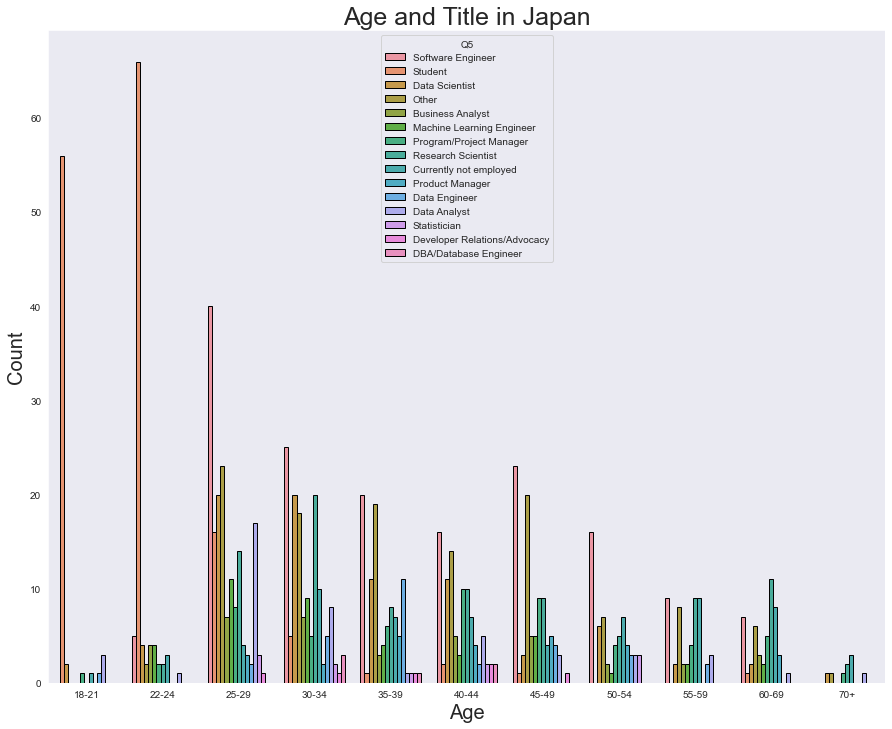

In [18]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q5", order = age_order, ec="black", data=jp)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Title in Japan", fontsize=25)
plt.show()

**AGE and Education**

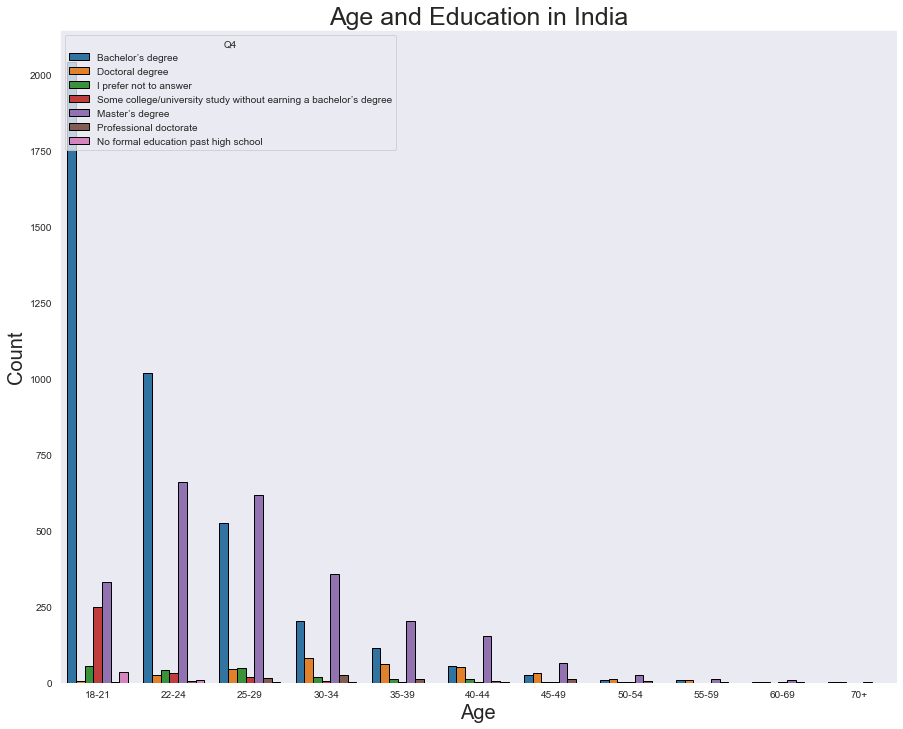

In [19]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q4", order = age_order, ec="black", data=ind)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Education in India", fontsize=25)
plt.show()

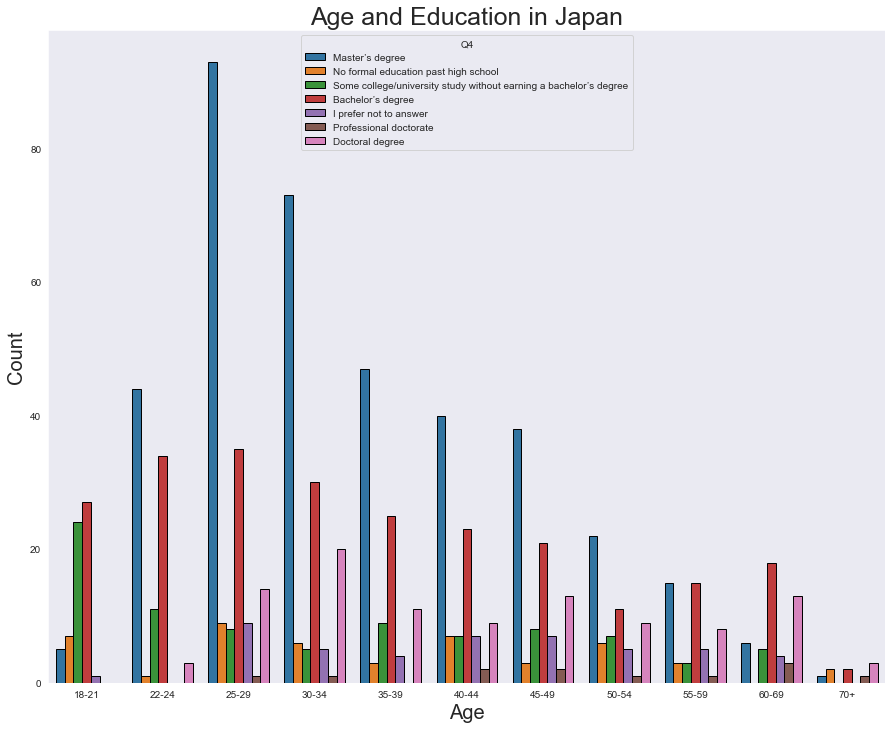

In [20]:
fig = plt.figure(figsize=(15,12))
age_order = ['18-21', '22-24', '25-29','30-34','35-39', '40-44','45-49', '50-54','55-59', '60-69', '70+']
sns.countplot(x = "Q1", hue = "Q4", order = age_order, ec="black", data=jp)
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Age and Education in Japan", fontsize=25)
plt.show()

**Education and Title**

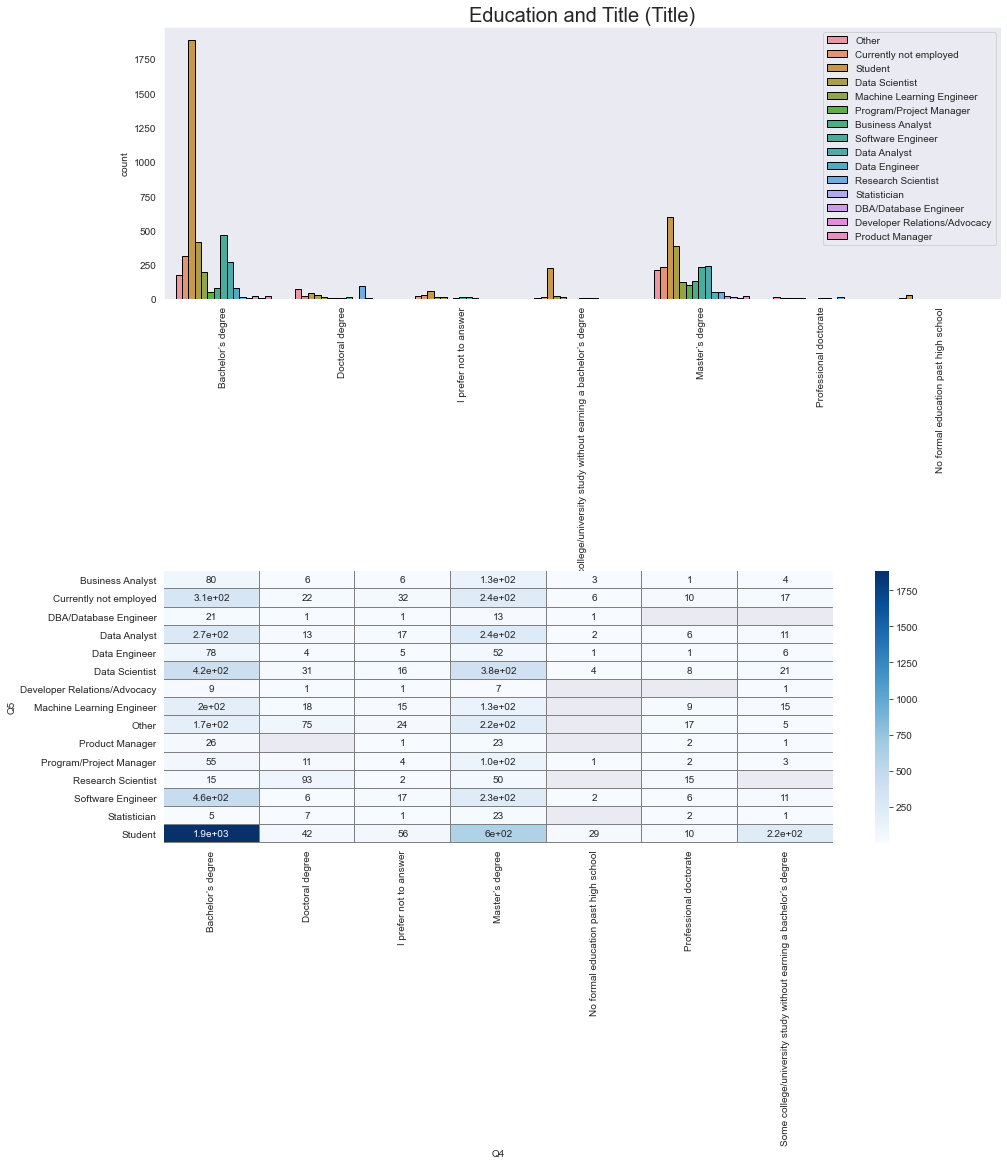

In [21]:
fig, axes = plt.subplots(2,1, figsize= (15,15))
plt.subplots_adjust(wspace=0.4, hspace=1)
sns.countplot(x = "Q4", hue = "Q5", ec="black", data=ind, ax=axes[0])
axes[0].legend(loc = 'upper right')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
axes[0].set_title("Education and Title (Title)", fontsize=20)

pivot = ind.pivot_table(index="Q4", columns = "Q5",values="Q1" , aggfunc = "count")
sns.heatmap(pivot.T, cmap = "Blues", annot=True, linewidths=0.005, linecolor='gray',  ax=axes[1])
plt.show()

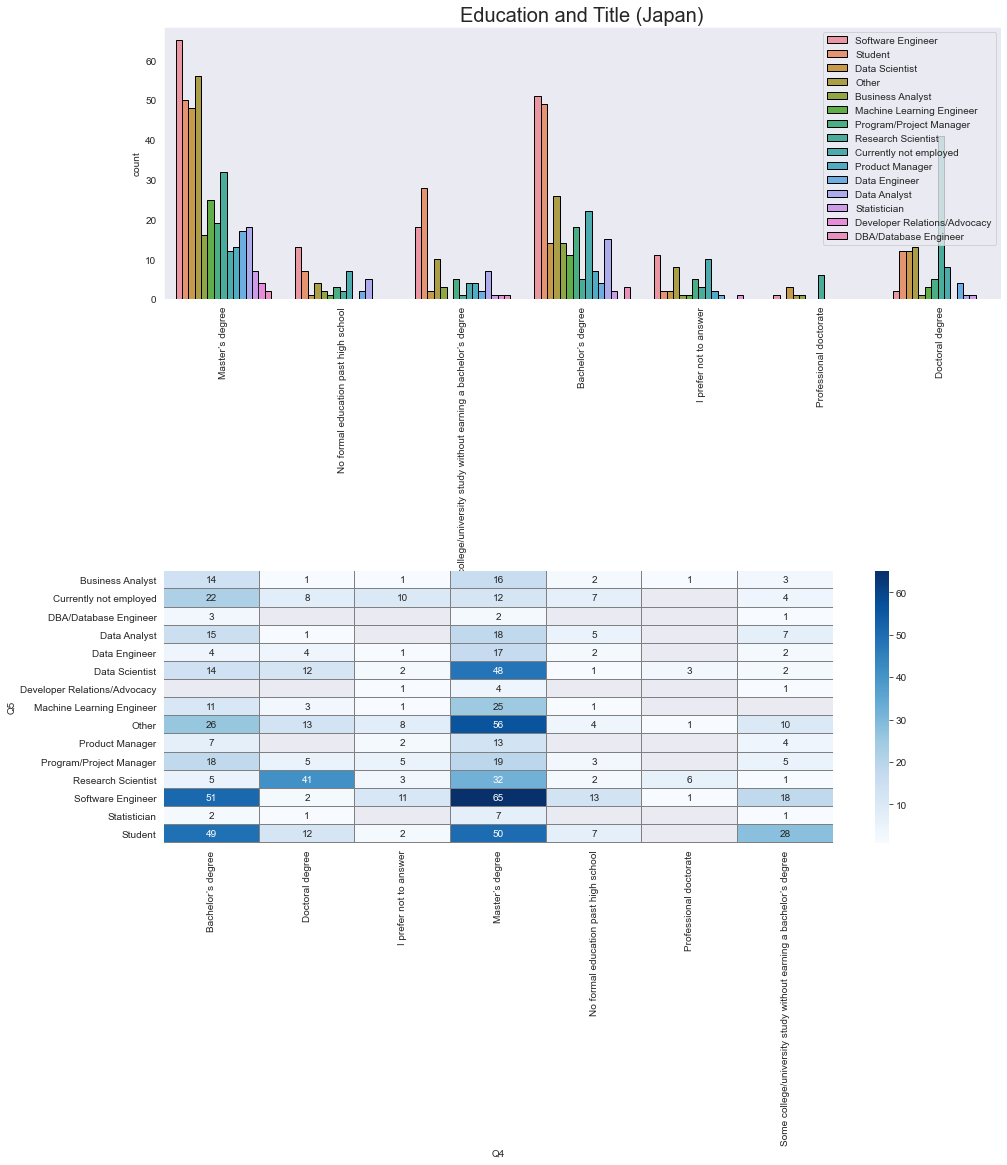

In [22]:
fig, axes = plt.subplots(2,1, figsize= (15,15))
plt.subplots_adjust(wspace=0.4, hspace=1)
sns.countplot(x = "Q4", hue = "Q5", ec="black", data=jp, ax=axes[0])
axes[0].legend(loc = 'upper right')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
axes[0].set_title("Education and Title (Japan)", fontsize=20)

pivot = jp.pivot_table(index="Q4", columns = "Q5",values="Q1" , aggfunc = "count")
sns.heatmap(pivot.T, cmap = "Blues", annot=True, linewidths=0.005, linecolor='gray',  ax=axes[1])
plt.show()

**Let's Look at Languages.**

**I am a proud Python user. As we all know, python is the talk of the town right now as it is simple and easy to use. I want to look at the distribution of the question related to programming Language. I am going to use *ECDF* i.e *Empirical Cumulative Distribution Function*.**

In [23]:
def SqlorPython(x):
    category = ""
    if (x["Q7_Part_3"] == "SQL")  & (x["Q7_Part_1"] =="Python"):
        category = "Both"
    elif (x["Q7_Part_3"] == "SQL")  & (x["Q7_Part_1"] !="Python"):
        category = "SQL"
    elif (x["Q7_Part_3"] != "SQL")  & (x["Q7_Part_1"] =="Python"):
        category = "Python"
    elif (x["Q7_Part_3"] != "SQL")  & (x["Q7_Part_1"] !="Python"):
        category = "NoUser"
    return category

In [24]:
ind["Sql_or_Python"] = ind.apply(SqlorPython, axis=1)

<ipython-input-24-f8faf9fd9fd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind["Sql_or_Python"] = ind.apply(SqlorPython, axis=1)


In [25]:
jp["Sql_or_Python"] = jp.apply(SqlorPython, axis=1)

<ipython-input-25-ff1968682264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jp["Sql_or_Python"] = jp.apply(SqlorPython, axis=1)


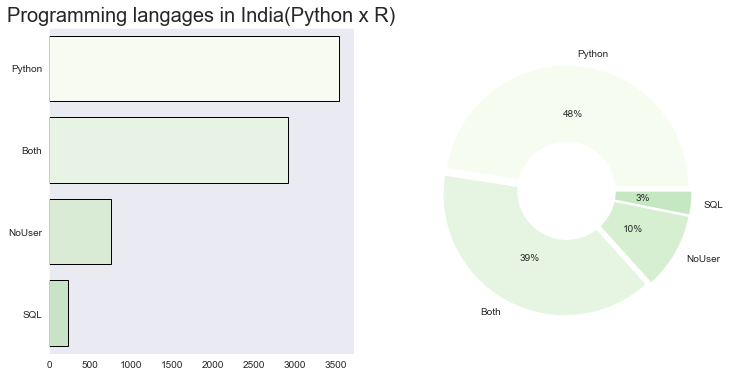

In [26]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
counts = ind["Sql_or_Python"].value_counts()
sns.barplot(x = counts.values, y=counts.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Programming langages in India(Python x R)", fontsize=20)
axes[1].pie(x= counts,labels = counts.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in counts.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

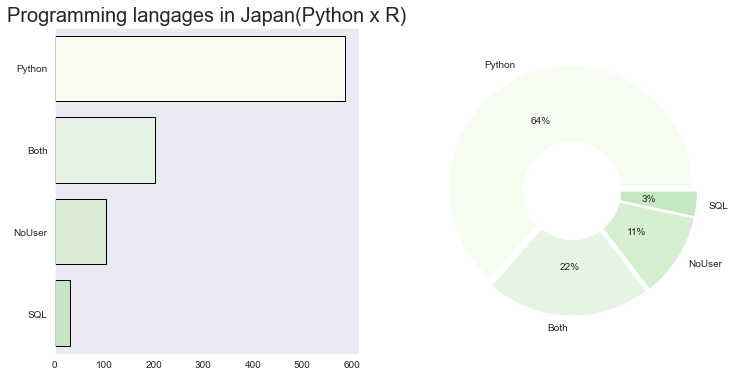

In [27]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
counts = jp["Sql_or_Python"].value_counts()
sns.barplot(x = counts.values, y=counts.index, palette=col_def,
            edgecolor = "black",ax=axes[0])
axes[0].set_title("Programming langages in Japan(Python x R)", fontsize=20)
axes[1].pie(x= counts,labels = counts.index, colors=col_def,autopct='%.0f%%',
           explode=[0.03 for i in counts.index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

**In Japan there seems to be a high number of python users. A very little of 3% of SQL users. And 22% of both the users. Compared to that India has 'Python' and 'both' users almost same (Like very close). It has the same no. of users for SQL though.**

#### Let's look at different IDEs used by the survey users

In [28]:
#India
IDE_ind = []
for i in ind.columns:
    if "Q9" in i:
        IDE_ind.append(i)
        
df_Q9_ind = ind[IDE_ind]
df_Q9_desc_ind = df_Q9_ind.describe(include="all").T.sort_values("freq", ascending=False)
df_Q9_desc_ind["prop"] = df_Q9_desc_ind["freq"] / df_Q9_ind.shape[0]

In [29]:
df_Q9_desc_ind[["top", "freq", "prop"]]

,top,freq,prop
Q9_Part_11,Jupyter Notebook,5165,0.694781
Q9_Part_4,Visual Studio Code (VSCode),3000,0.403551
Q9_Part_5,PyCharm,2212,0.297552
Q9_Part_1,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",1552,0.208771
Q9_Part_6,Spyder,1270,0.170837
Q9_Part_7,Notepad++,1170,0.157385
Q9_Part_3,Visual Studio,1152,0.154964
Q9_Part_2,RStudio,1107,0.14891
Q9_Part_8,Sublime Text,863,0.116088
Q9_Part_10,MATLAB,660,0.088781


In [30]:
#Japan
IDE_jp = []
for i in jp.columns:
    if "Q9" in i:
        IDE_jp.append(i)
        
df_Q9_jp = jp[IDE_jp]
df_Q9_desc_jp = df_Q9_jp.describe(include="all").T.sort_values("freq", ascending=False)
df_Q9_desc_jp["prop"] = df_Q9_desc_jp["freq"] / df_Q9_jp.shape[0]

In [31]:
df_Q9_desc_jp[["top", "freq", "prop"]]

,top,freq,prop
Q9_Part_11,Jupyter Notebook,514,0.558089
Q9_Part_4,Visual Studio Code (VSCode),415,0.450597
Q9_Part_1,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",201,0.218241
Q9_Part_3,Visual Studio,136,0.147666
Q9_Part_5,PyCharm,108,0.117264
Q9_Part_9,Vim / Emacs,99,0.107492
Q9_Part_2,RStudio,92,0.099891
Q9_Part_6,Spyder,70,0.076004
Q9_OTHER,Other,50,0.054289
Q9_Part_8,Sublime Text,36,0.039088


**Now its time to plot**

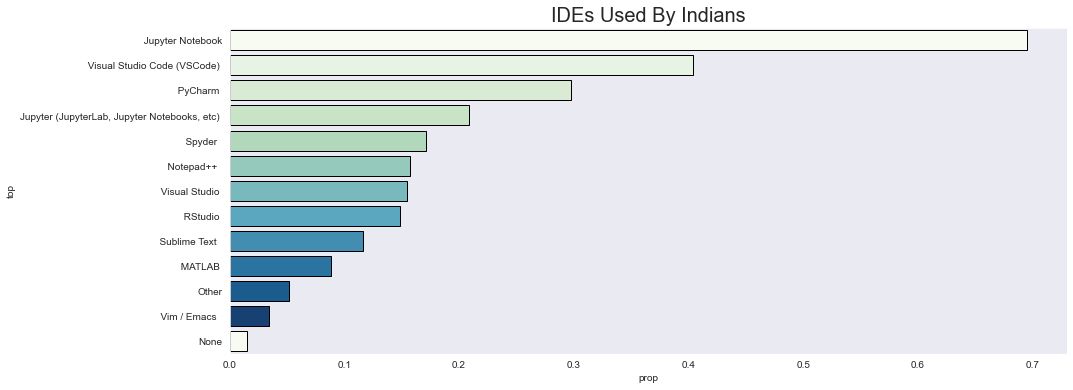

In [32]:
#Indians
plt.figure(figsize=(15,6))
sns.barplot(x="prop", y="top",data= df_Q9_desc_ind, palette = col_def, edgecolor = "black")
plt.title("IDEs Used By Indians", fontsize=20)

plt.show()

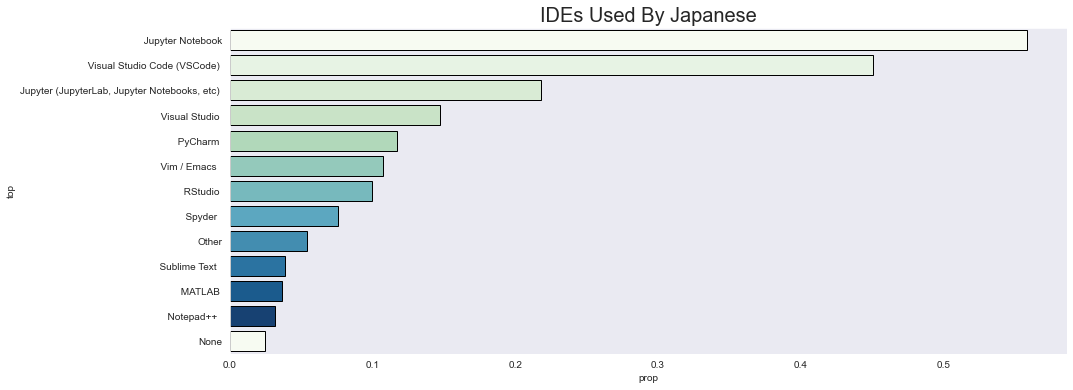

In [33]:
#Japanese
plt.figure(figsize=(15,6))
sns.barplot(x="prop", y="top",data= df_Q9_desc_jp, palette = col_def, edgecolor = "black")
plt.title("IDEs Used By Japanese", fontsize=20)

plt.show()

The first two places in both the coutries is same i.e, Jupyter Notebook and VSCode. The surprising thing is that PyCharm is not that popular in Japan compared to India. Another thing is that why are so many Indians still using Notepad ++. That's the one that is going to keep me awake at night. Fortunately Notepad++ is very unpopular in Japan. After this analysis on IDEs I got to know a new one named Vim. 

### Anyway this was really fun. I want to say that this is the end, but I will most probably explore other things in the dataset. So, keep an eye on that. If you liked this notebook then please upvote will really help me get motivated.